In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

pyber_df = pd.merge(ride_df, city_df, on="city")


In [3]:
# Display the data table for preview

pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

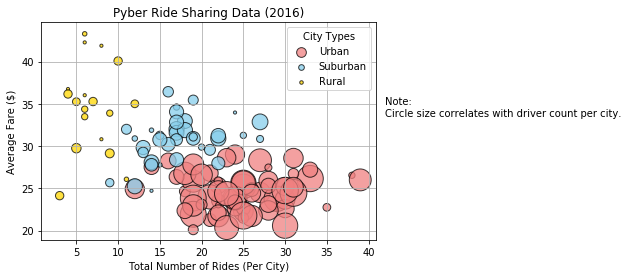

In [30]:
# Obtain the x and y coordinates for each of the three city types

# Use .loc to separate the city types into three different dataframes
urban_data = pyber_df.loc[pyber_df["type"] == "Urban"]
suburb_data = pyber_df.loc[pyber_df["type"] == "Suburban"]
rural_data = pyber_df.loc[pyber_df["type"] == "Rural"]

# Use each data frame to set specific variables for x & y variables

    # Urban x & y

urban_group = urban_data.groupby(["city"])
    
urban_y = urban_group["fare"].sum() / urban_group["fare"].count()
urban_x = urban_group["fare"].count()

    # Urban bubble size created by finding all unique values in the driver count column of the groupby

urban_temp = urban_group["driver_count"].unique()

    # Then convert the resulting series to a list

urban_list = urban_temp.tolist()

    # Once it's a list, we can use list comprehension to convert each item into an integer and multiply it by 10
    # so that the resulting bubble size is appropriately sized
    
urban_bubble = [int(x) * 10 for x in urban_list]

    # Suburban x & y

suburb_group = suburb_data.groupby(["city"])

suburb_y = suburb_group["fare"].sum() / suburb_group["fare"].count()
suburb_x = suburb_group["fare"].count()

    # Perform the same bubble size operation as above

suburb_temp = suburb_group["driver_count"].unique()

suburb_list = suburb_temp.tolist()

suburb_bubble = [int(x) * 10 for x in suburb_list]

    # Rural x & y
    
rural_group = rural_data.groupby(["city"])
    
rural_y = rural_group["fare"].sum() / rural_group["fare"].count()
rural_x = rural_group["fare"].count()

    # Perform the same bubble size operation as above

rural_temp = rural_group["driver_count"].unique()

rural_list = rural_temp.tolist()

rural_bubble = [int(x) * 10 for x in rural_list]

# Build the scatter plots for each city types

plt.scatter(urban_x, urban_y, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_bubble, alpha=0.75,label="Urban")

plt.scatter(suburb_x, suburb_y, marker="o", facecolors="skyblue", edgecolors="black", s=suburb_bubble, alpha=0.75, label="Suburban")

plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", s=rural_bubble, alpha=0.75, label="Rural")

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend

plt.legend(loc="best", markerscale=0.5, title="City Types")

# Incorporate a text label regarding circle size

plt.text(42,35,"Note:")
plt.text(42,33.5,"Circle size correlates with driver count per city.")

# Save Figure

plt.savefig("images/PyberBubbleChart.png")

# Show the plot

plt.show()


## Total Fares by City Type

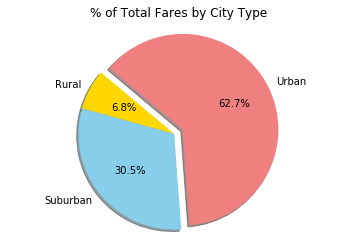

In [32]:
# Calculate Type Percents

# Find the total amount of fares paid
fare_total = pyber_df["fare"].sum()

# Group the original dataframe by type
type_group = pyber_df.groupby(["type"])

# Use list comprehension to find the individual percentages and add them to a new list
fare_percent_list = [x / fare_total * 100 for x in type_group["fare"].sum()]

# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0, 0, 0.1]

plt.pie(fare_percent_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("images/PyberFaresPieChart.png")

# Show Figure

plt.show()


## Total Rides by City Type

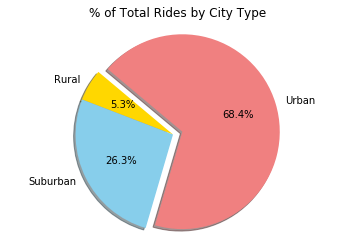

In [38]:
# Calculate Ride Percents

# Use list comprehension, employing the type group created above with .count() to find the total number of items,
# then create the relevant percentages and add them to a new list
ride_percent_list = [x / pyber_df["ride_id"].count() * 100 for x in type_group["ride_id"].count()]

# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0, 0, 0.1]

plt.pie(ride_percent_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("images/PyberRidesPieChart.png")

# Show Figure

plt.show()


## Total Drivers by City Type

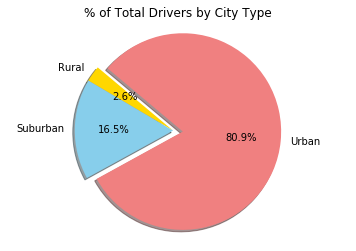

In [63]:
# Calculate Driver Percents

# Rural unique driver count to be gathered
    # Use list comprehension to convert Rural List values into integers
temp_percent_rural = [int(x) for x in rural_list]

    # Create new variable that contains the first value in the newly created list
driver_rural_total = temp_percent_rural[0]

    # Create a For Loop that sums each value in the created list, starting with the first value
for x in range(len(temp_percent_rural) - 1):
    driver_rural_total = driver_rural_total + temp_percent_rural[x + 1]
    
# Repeat the same process as above using the suburb list to get the suburb total
temp_percent_suburb = [int(x) for x in suburb_list]

driver_suburb_total = temp_percent_suburb[0]

for x in range(len(temp_percent_suburb) - 1):
    driver_suburb_total = driver_suburb_total + temp_percent_suburb[x + 1]

# Repeat the same process as above using the urban list
temp_percent_urban = [int(x) for x in urban_list]

driver_urban_total = temp_percent_urban[0]

for x in range(len(temp_percent_urban) - 1):
    driver_urban_total = driver_urban_total + temp_percent_urban[x + 1]
    

# Sum each driver total and create a list containing each individual percentile calculation

driver_sum_total = driver_rural_total + driver_suburb_total + driver_urban_total

list_for_iterating = [driver_rural_total, driver_suburb_total, driver_urban_total]

driver_percent_list = [x / driver_sum_total * 100 for x in list_for_iterating]

# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0, 0, 0.1]

plt.pie(driver_percent_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("images/PyberDriverPieChart.png")

# Show Figure

plt.show()
